In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time
from pynq.overlays.base import BaseOverlay
from pynq.lib.arduino import arduino_io
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

p1 = arduino_io.Arduino_IO(base.iop_arduino.mb_info, 14, 'out')
p2 = arduino_io.Arduino_IO(base.iop_arduino.mb_info, 15, 'out')
p3 = arduino_io.Arduino_IO(base.iop_arduino.mb_info, 16, 'out')
p4 = arduino_io.Arduino_IO(base.iop_arduino.mb_info, 17, 'out')

Mode = VideoMode(640,480,24)

    # monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
    # camera (input) configuration
frame_in_w = 640
frame_in_h = 480

    # initialize camera from OpenCV
#    import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);
print("Capture device is open: " + str(videoIn.isOpened()))

def set_pins(pins, value):
    for pin in pins:
        pin.write(value)

steps = [
    [p1],
    [p1, p2],
    [p2],
    [p2, p3],
    [p3],
    [p3, p4],
    [p4],
    [p1, p4]
]

steps_back = [
    [p4],
    [p4, p3],
    [p3],
    [p3, p2],
    [p2],
    [p2, p1],
    [p1],
    [p4, p1]
]

pins = [p1, p2, p3, p4]

Capture device is open: True


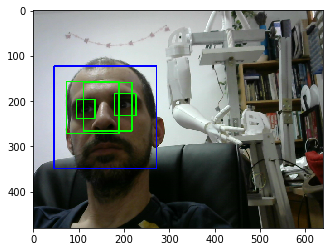

x move from center: - 161.0


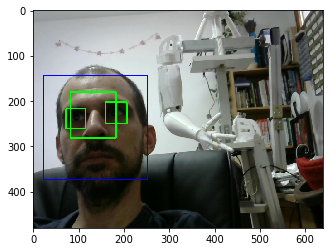

x move from center: - 182.5


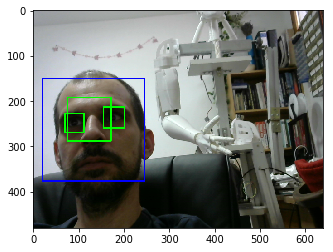

x move from center: - 187.0


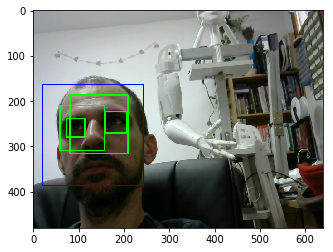

x move from center: - 188.0


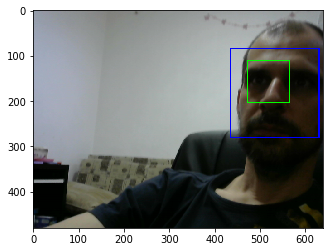

x move from center:  213.0


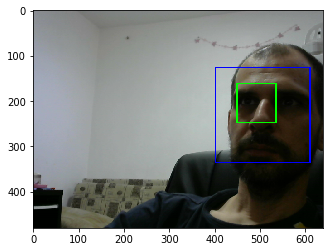

x move from center:  186.5


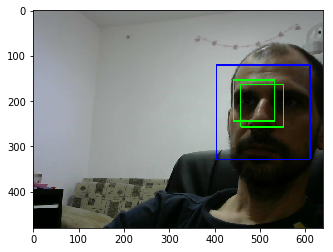

x move from center:  187.5


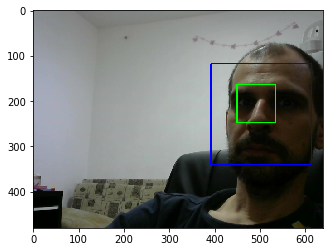

x move from center:  183.0


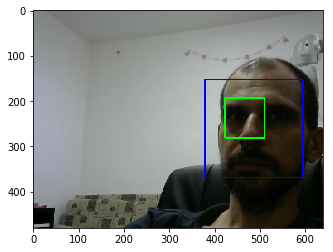

x move from center:  167.0


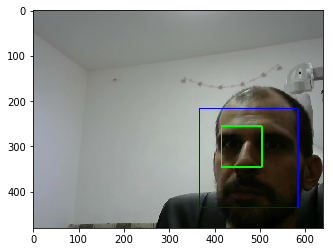

x move from center:  155.5


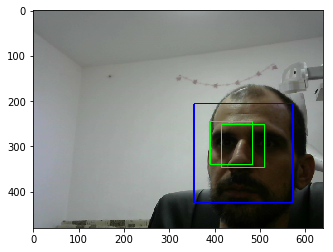

x move from center:  144.0


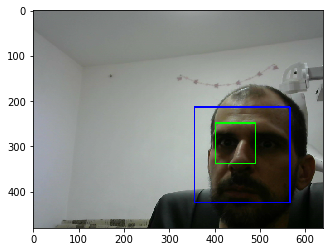

x move from center:  141.5


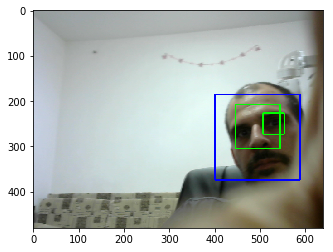

x move from center:  175.0


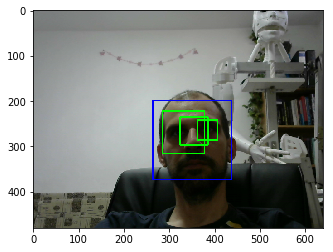

x move from center:  31.0


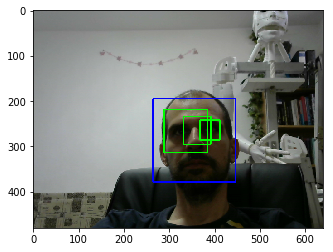

x move from center:  35.5


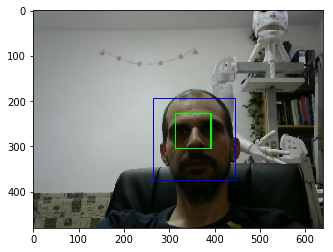

x move from center:  36.5


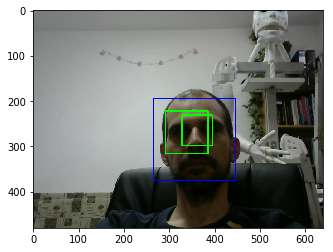

x move from center:  36.5


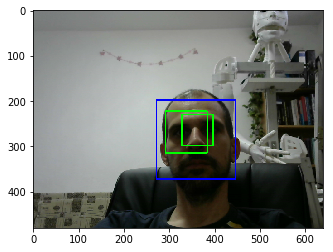

x move from center:  39.0


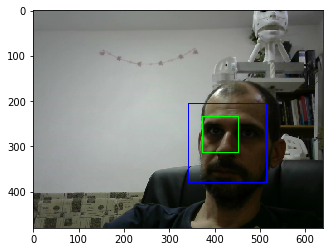

x move from center:  109.0


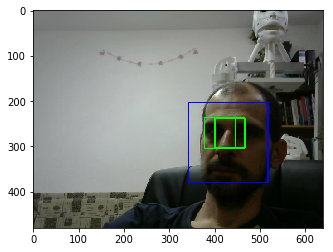

x move from center:  110.0


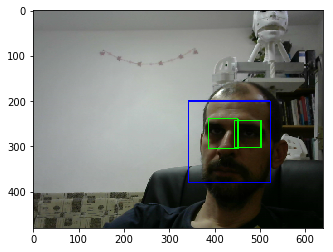

x move from center:  113.0


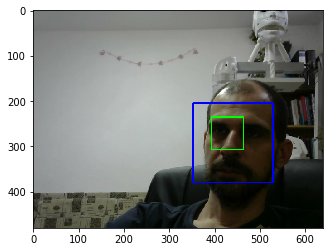

x move from center:  121.0


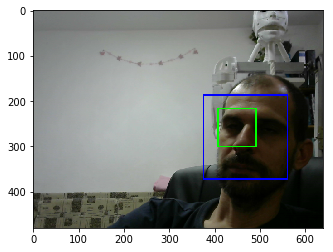

x move from center:  148.5


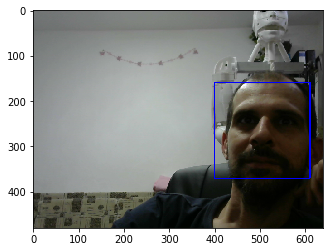

x move from center:  185.5


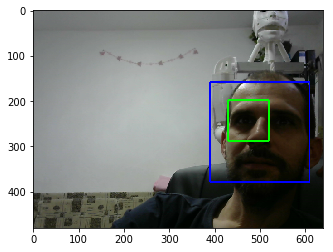

x move from center:  180.0


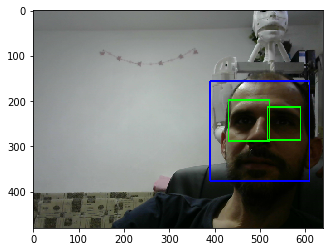

x move from center:  180.0


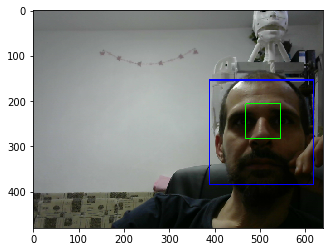

x move from center:  184.0


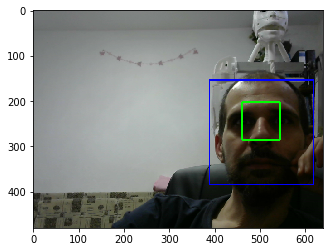

x move from center:  184.0


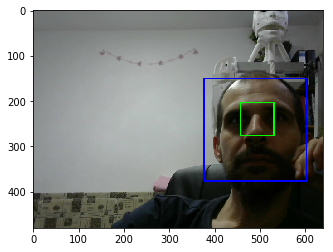

x move from center:  170.0


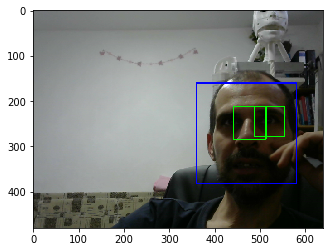

x move from center:  150.5


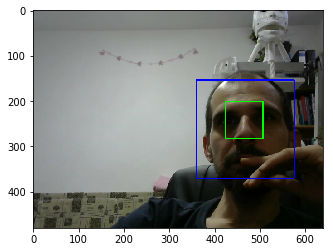

x move from center:  148.0


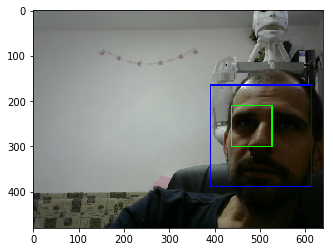

x move from center:  182.5


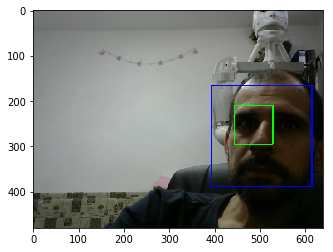

x move from center:  184.0


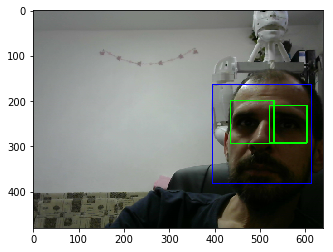

x move from center:  185.0


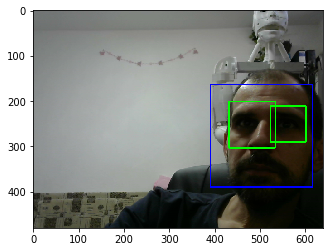

x move from center:  184.0


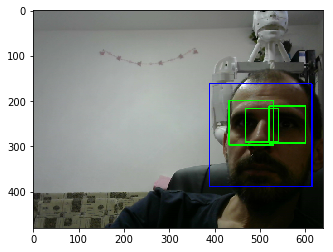

x move from center:  182.0


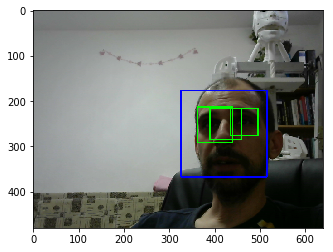

x move from center:  101.0


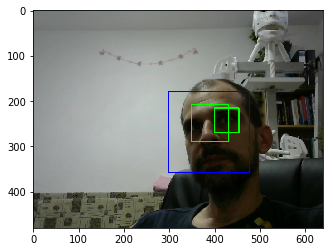

x move from center:  67.5


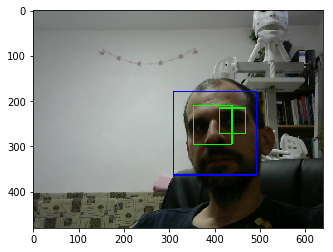

x move from center:  81.0


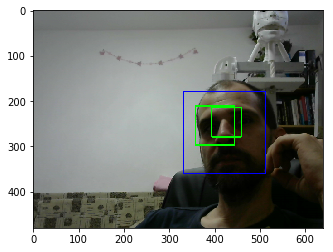

x move from center:  101.5


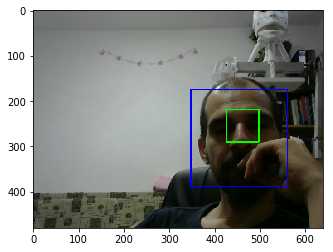

x move from center:  134.5


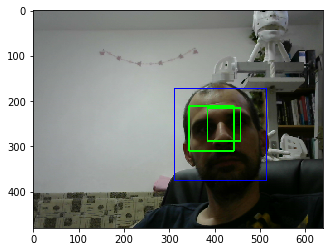

x move from center:  93.5


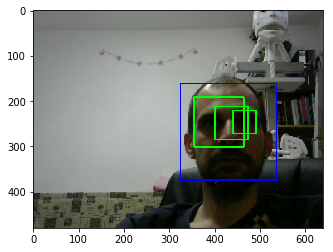

x move from center:  111.0


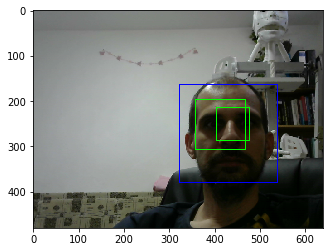

x move from center:  111.0


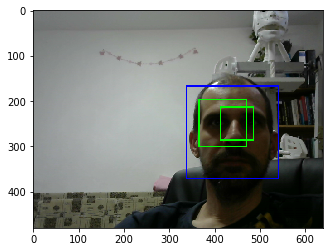

x move from center:  120.0


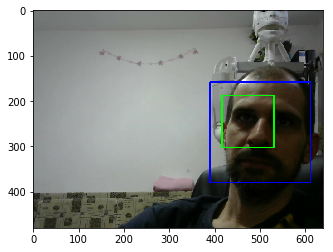

x move from center:  181.0


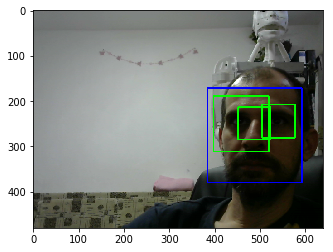

x move from center:  169.0


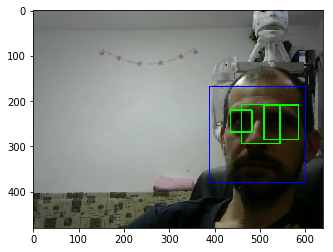

x move from center:  175.0


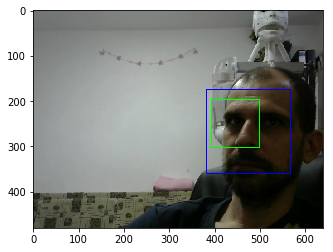

x move from center:  155.0


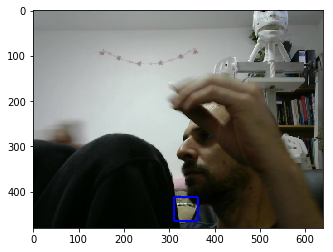

x move from center:  17.5


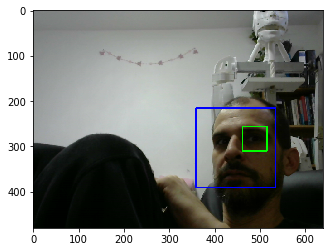

x move from center:  127.0


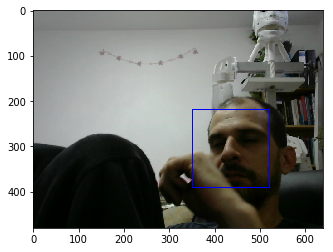

x move from center:  116.5


KeyboardInterrupt: 

In [3]:
while(1):

    ret, frame_vga = videoIn.read()
    np_frame = frame_vga
    face_cascade = cv2.CascadeClassifier(
        '/home/xilinx/jupyter_notebooks/base/video/data/'
        'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(
        '/home/xilinx/jupyter_notebooks/base/video/data/'
        'haarcascade_eye.xml')
    gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = np_frame[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

        
        %matplotlib inline 
        plt.imshow(np_frame[:,:,[2,1,0]])
        plt.show()
        
        xmove = 0
        ymove = 0
        posx = x + (w/2)
        posy = y + (h/2)
        current_step = 0
        if( posx >= 320 ):
            xmove = posx - 320
            print("x move from center: ", xmove )
            for i in range(0, int(xmove)):
                high_pins = steps[current_step]
                set_pins(pins, 0)
                set_pins(high_pins, 1)
                current_step += 1
                if current_step == len(steps):
                    current_step = 0
                time.sleep(0.01)
            
        else:
            xmove = 320 - posx
            print("x move from center: -", xmove )
            for i in range(0, int(xmove)):
                high_pins = steps_back[current_step]
                set_pins(pins, 0)
                set_pins(high_pins, 1)
                current_step += 1
                if current_step == len(steps_back):
                    current_step = 0
                time.sleep(0.01)
                
        set_pins(pins, 0)
        
        #print("posy: ", ymove )
        


            
        

    
    



In [4]:
    videoIn.release()